In [2]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# Least squares and linear basis functions models
## Least squares

In [3]:
def least_squares(y, tx):
    """calculate the least squares solution."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # least squares: TODO
    # returns mse, and optimal weights
    # ***************************************************
    return np.linalg.solve(tx.T.dot(tx),tx.T.dot(y))
    #return np.linalg.inv(tx.T.dot(tx)).dot(tx.T).dot(y)

### Load the data
Here we will reuse the dataset `height_weight_genders.csv` from previous exercise section to check the correctness of your implementation. Please compare it with your previous result.

In [4]:
def compute_cost(y, tx, w):
    return compute_cost_MSE(y,tx,w)
    
def compute_cost_MSE(y,tx,w):
    e=y-(tx @ w)
    return 1/2/y.shape[0]*(e.T @ e)
def compute_cost_MAE(y,tx,w):
    e=y-(tx @ w)
    return 1/y.shape[0]*np.absolute(e).sum()
def compute_cost_RMSE(y,tx,w):
    return np.sqrt(2*compute_cost_MSE(y,tx,w))

In [5]:
def grid_search(y, tx, w0, w1):
    """Algorithm for grid search."""
    loss = np.zeros((len(w0), len(w1)))
    
    for i in np.arange(len(w0)) :
        for j in np.arange(len(w1)):
            loss[i,j]=compute_cost(y,tx,np.array([w0[i],w1[j]]))
    
    return loss

In [6]:
from helpers import *
def test_your_least_squares():
    height, weight, gender = load_data_from_ex02(sub_sample=False, add_outlier=False)
    x, mean_x, std_x = standardize(height)
    y, tx = build_model_data(x, weight)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # least square or grid search: TODO
    # this code should compare the optimal weights obtained 
    # by least squares vs. grid search
    # ***************************************************
    return 0
    raise NotImplementedError

test_your_least_squares()

0

## Least squares with a linear basis function model
Start from this section, we will use the dataset `dataEx3.csv`.

### Implement polynomial basis functions

In [7]:
# load dataset
x, y = load_data()
print("shape of x {}".format(x.shape))
print("shape of y {}".format(y.shape))

shape of x (50,)
shape of y (50,)


In [8]:
def build_poly(x, degree):
    """polynomial basis functions for input data x, for j=0 up to j=degree."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # polynomial basis function: TODO
    # this function should return the matrix formed
    # by applying the polynomial basis to the input data
    # ***************************************************
    m =np.ones((x.shape[0],degree+1))
    for i in range(x.shape[0]):
        for j in range(1,degree+1):
            m[i][j] = x[i]**j#x[i]*m[i][j-1] #
    return m

Let us play with polynomial regression. Note that we will use your implemented function `compute_mse`. Please copy and paste your implementation from exercise02.

Processing 1th experiment, degree=1, rmse=0.11133351726547978
Processing 2th experiment, degree=3, rmse=0.03343252619709051
Processing 3th experiment, degree=7, rmse=0.03116473414388121
Processing 4th experiment, degree=12, rmse=0.028985148874923955


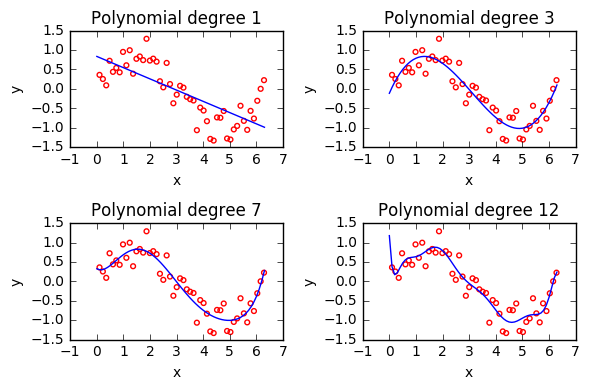

In [9]:
from plots import *

def polynomial_regression():
    """Constructing the polynomial basis function expansion of the data,
       and then running least squares regression."""
    # define parameters
    degrees = [1, 3, 7, 12]
    
    # define the structure of figure
    num_row = 2
    num_col = 2
    f, axs = plt.subplots(num_row, num_col)

    for ind, degree in enumerate(degrees):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # form the data to do polynomial regression.: TODO
        # ***************************************************
        tx = build_poly(x,degree)
        # ***************************************************
        # INSERT YOUR CODE HERE
        # least square and calculate rmse: TODO
        # ***************************************************
        weight = least_squares(y,tx)
        #print(y,tx)
        rmse = compute_cost_MSE(y,tx,weight)

        print("Processing {i}th experiment, degree={d}, rmse={loss}".format(
              i=ind + 1, d=degree, loss=rmse))
        # plot fit
        plot_fitted_curve(
            y, x, weight, degree, axs[ind // num_col][ind % num_col])
    plt.tight_layout()
    plt.savefig("visualize_polynomial_regression")
    plt.show()


polynomial_regression()

# Evaluating model predication performance

Let us show the train and test splits for various polynomial degrees. First of all, please fill in the function `split_data()`

In [10]:
def split_data(x, y, ratio, seed=1):
    """split the dataset based on the split ratio."""
    # set seed
    np.random.seed(seed)
    assert x.shape[0] == y.shape[0]
    idPerm = np.random.permutation(x.shape[0])
    splitId = int(np.floor(x.shape[0]*ratio))
    
    trainy = np.array([y[i] for i in idPerm[:splitId]])
    trainx = np.array([x[i] for i in idPerm[:splitId]])
    
    testy = np.array([y[i] for i in idPerm[splitId:]])
    testx = np.array([x[i] for i in idPerm[splitId:]])
    
    
    return ((trainx,trainy),(testx,testy))
    # ***************************************************
    # INSERT YOUR CODE HERE
    # split the data based on the given ratio: TODO
    # ***************************************************
    raise NotImplementedError

Then, test your `split_data` function below.

In [11]:
def train_test_split_demo(x, y, degree, ratio, seed):
    """polynomial regression with different split ratios and different degrees."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # split the data, and return train and test data: TODO
    # ***************************************************
    ((trainx,trainy),(testx,testy)) = split_data(x,y,ratio,seed)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # form train and test data with polynomial basis function: TODO
    # ***************************************************
    trainpoly = build_poly(trainx,degree)
    testpoly = build_poly(testx,degree)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # calcualte weight through least square.: TODO
    # ***************************************************
    w = least_squares(trainy,trainpoly)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # calculate RMSE for train and test data,
    # and store them in rmse_tr and rmse_te respectively: TODO
    # ***************************************************
    rmse_tr = compute_cost_RMSE(trainy,trainpoly,w)
    rmse_te = compute_cost_RMSE(testy,testpoly,w)
    
    print("proportion={p}, degree={d}, Training RMSE={tr:.3f}, Testing RMSE={te:.3f}".format(
          p=ratio, d=degree, tr=rmse_tr, te=rmse_te))

seed = 6
degrees = [1, 3, 7, 12]
split_ratios = [0.9, 0.5, 0.1]

for split_ratio in split_ratios:
    for degree in degrees:
        train_test_split_demo(x, y, degree, split_ratio, seed)

proportion=0.9, degree=1, Training RMSE=0.494, Testing RMSE=0.181
proportion=0.9, degree=3, Training RMSE=0.264, Testing RMSE=0.206
proportion=0.9, degree=7, Training RMSE=0.254, Testing RMSE=0.220
proportion=0.9, degree=12, Training RMSE=0.243, Testing RMSE=0.255
proportion=0.5, degree=1, Training RMSE=0.455, Testing RMSE=0.531
proportion=0.5, degree=3, Training RMSE=0.239, Testing RMSE=0.296
proportion=0.5, degree=7, Training RMSE=0.232, Testing RMSE=0.284
proportion=0.5, degree=12, Training RMSE=0.205, Testing RMSE=1.498
proportion=0.1, degree=1, Training RMSE=0.428, Testing RMSE=0.534
proportion=0.1, degree=3, Training RMSE=0.085, Testing RMSE=0.460
proportion=0.1, degree=7, Training RMSE=0.000, Testing RMSE=1.985
proportion=0.1, degree=12, Training RMSE=0.000, Testing RMSE=5.692


# Ridge Regression
Please fill in the function below.

In [12]:
def ridge_regression(y, tx, lamb):
    """implement ridge regression."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # ridge regression: TODO
    # ***************************************************
    lambp = lamb*(2*tx.shape[0])
    return np.linalg.inv(tx.T.dot(tx)+lambp*np.eye(tx.shape[1])).dot(tx.T).dot(y)
    #return np.linalg.inv((tx.t @ tx) + lambp*np.eye(tx.shape[0])) @ tx.T @ y

In [13]:
def ridge_regression_demo(x, y, degree, ratio, seed):
    """ridge regression demo."""
    # define parameter
    lambdas = np.logspace(-3, 1, 10)    
    # ***************************************************
    # INSERT YOUR CODE HERE
    # split the data, and return train and test data: TODO
    # ***************************************************
    ((trainx,trainy),(testx,testy)) = split_data(x,y,ratio,seed)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # form train and test data with polynomial basis function: TODO
    # ***************************************************
    trainpoly = build_poly(trainx,degree)
    testpoly = build_poly(testx,degree)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # ridge regression with different lambda: TODO
    # ***************************************************
    for lamb in lambdas:
        w = ridge_regression(trainy,trainpoly,lamb)

seed = 6
degree = 7
split_ratio = 0.5
ridge_regression_demo(x, y, degree, split_ratio, seed)

In [14]:
m = np.logspace(-3, 1, 10)  
print(m)

[  1.00000000e-03   2.78255940e-03   7.74263683e-03   2.15443469e-02
   5.99484250e-02   1.66810054e-01   4.64158883e-01   1.29154967e+00
   3.59381366e+00   1.00000000e+01]
